In [1]:
import pandas as pd
import numpy as np

from statsmodels.graphics.correlation import plot_corr

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv('Salaries.csv')

In [3]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
salary.shape

(397, 6)

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


##### No missing values

In [6]:
salary.duplicated().sum()

4

In [7]:
salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
salary.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
label = LabelEncoder()

In [10]:
salary['rank'] = label.fit_transform(salary['rank'])
salary['discipline'] = label.fit_transform(salary['discipline'])
salary['sex'] = label.fit_transform(salary['sex'])

In [11]:
salary_encoded = salary

In [12]:
salary_encoded

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [13]:
X = salary_encoded.drop('salary', axis=1)
y = salary_encoded[['salary']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size = test_data_size, random_state=seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

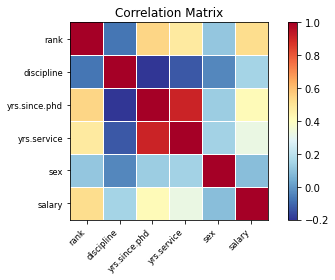

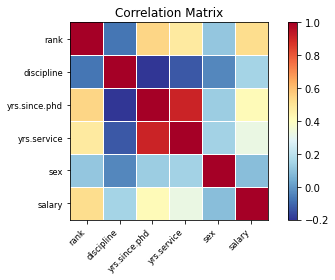

In [14]:
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')

In [15]:
train_data.corr(method = 'pearson')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.078677,0.543012,0.478549,0.110671,0.524130
discipline,-0.078677,1.000000,-0.201524,-0.131254,-0.039359,0.146455
yrs.since.phd,0.543012,-0.201524,1.000000,0.907201,0.131267,0.416828
yrs.service,0.478549,-0.131254,0.907201,1.000000,0.144895,0.319562
sex,0.110671,-0.039359,0.131267,0.144895,1.000000,0.087189
salary,0.524130,0.146455,0.416828,0.319562,0.087189,1.000000


In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = lin_reg.predict(X_test)

In [21]:
print ("Intercept:", lin_reg.intercept_)
print("Coefficients", lin_reg.coef_)

Intercept: [64369.42636178]
Coefficients [[15807.33036052 14934.37532743  1371.02879779  -882.74908058
   2987.09604895]]


In [22]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test,
predictions)))
# Evaluate R-square
print("R-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 19456.05544535472
Mean Squared Error(MSE): 610338261.1718318
Root Mean Squared Error(RMSE): 24705.02501864412
R-Square: 0.35898880473314576
